<a href="https://colab.research.google.com/github/Archimedes58/Projects/blob/main/End_to_end_ML_Project_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# show all outputs of a cell in a jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
# import libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder # change categorical to numeric variables
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [6]:
# mount the google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# mount the google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# open the health insurance dataset saved in the google drive
ins = pd.read_csv('/content/drive/MyDrive/learning cluster/insurance_2025.csv')

**Medical Cost Personal Datasets**

Source: https://www.kaggle.com/mirichoi0218/insurance

Variable definitions:

*age:* age of primary beneficiary

*sex:* insurance contractor's gender (female or male)

*bmi:* Body mass index, defined as kg / m^2

*children:* Number of children/dependents covered by health insurance

*smoker:* Smoking status (yes or no)

*region:* beneficiary's residential area in the US (northeast, southeast, southwest, or northwest)

*charges:* Individual medical costs billed by health insurance

In [9]:
# take a look at the first and last 6 rows of the dataset
ins.head()
ins.tail()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [10]:
# get a quick description of the data
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# take a look at the categorical variables
ins['sex'].value_counts() # sex
print('\n') # skip a line using \n
ins['smoker'].value_counts() # smoking status
print('\n')
ins['region'].value_counts() # regions

,count
sex,
male,676
female,662


,count
smoker,
no,1064
yes,274


,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [12]:
# report descriptive statistics of the dataset
# note that these statistics pertain to numerical features only
ins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['bmi'].plot(kind='line', figsize=(8, 4), title='bmi')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['children'].plot(kind='line', figsize=(8, 4), title='children')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['charges'].plot(kind='line', figsize=(8, 4), title='charges')
plt.gca().spines[['top', 'right']].set_visible(False)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

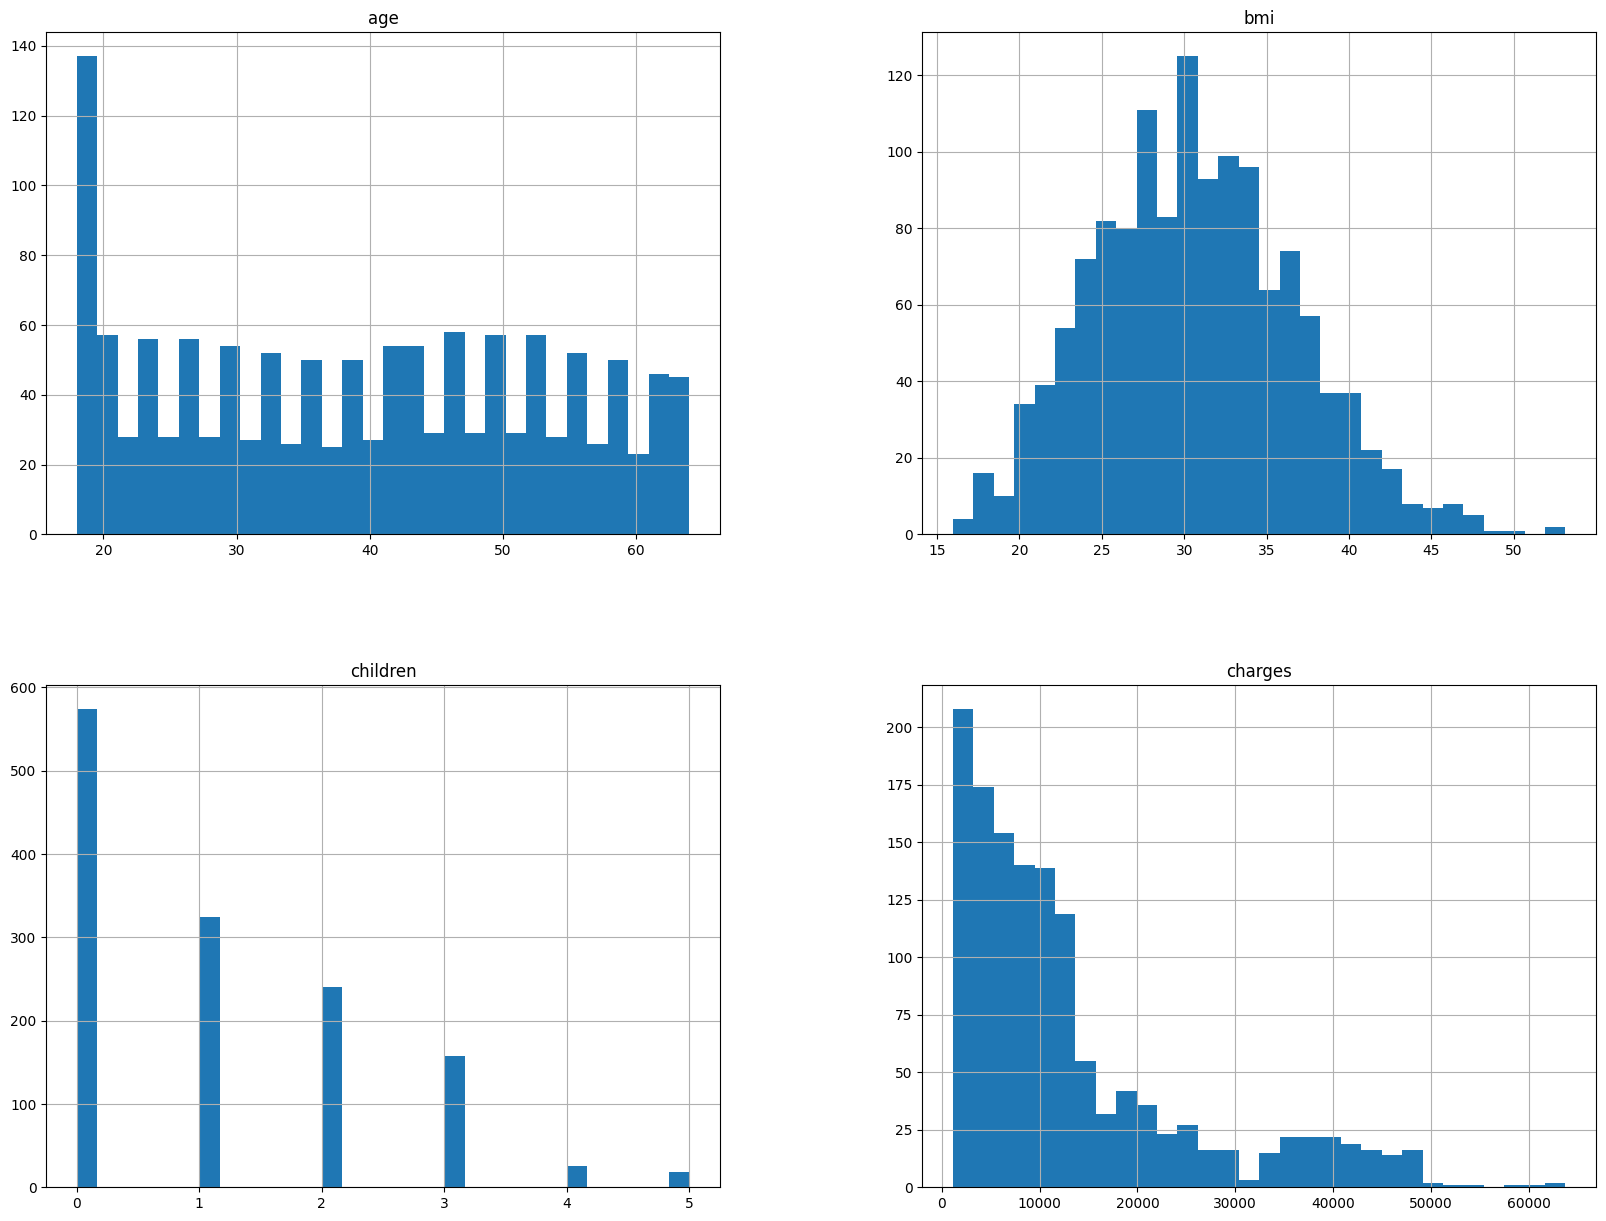

In [14]:
# plot histograms for each numerical feature
ins.hist(
    bins = 30, # number of bins
    figsize = (20, 15) # figure width and height
  )

In [15]:
# Select numerical columns
numerical_ins = ins.select_dtypes(include=['number'])

# Calculate correlation
corr_matrix = numerical_ins.corr()

In [ ]:
# compute pearson's correlation coefficient
print(corr_matrix)
print('\n')
print(corr_matrix['charges'].sort_values(ascending=False))

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


array([[<Axes: xlabel='charges', ylabel='charges'>,
        <Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>],
       [<Axes: xlabel='charges', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>],
       [<Axes: xlabel='charges', ylabel='bmi'>,
        <Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>],
       [<Axes: xlabel='charges', ylabel='children'>,
        <Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>]], dtype=object)

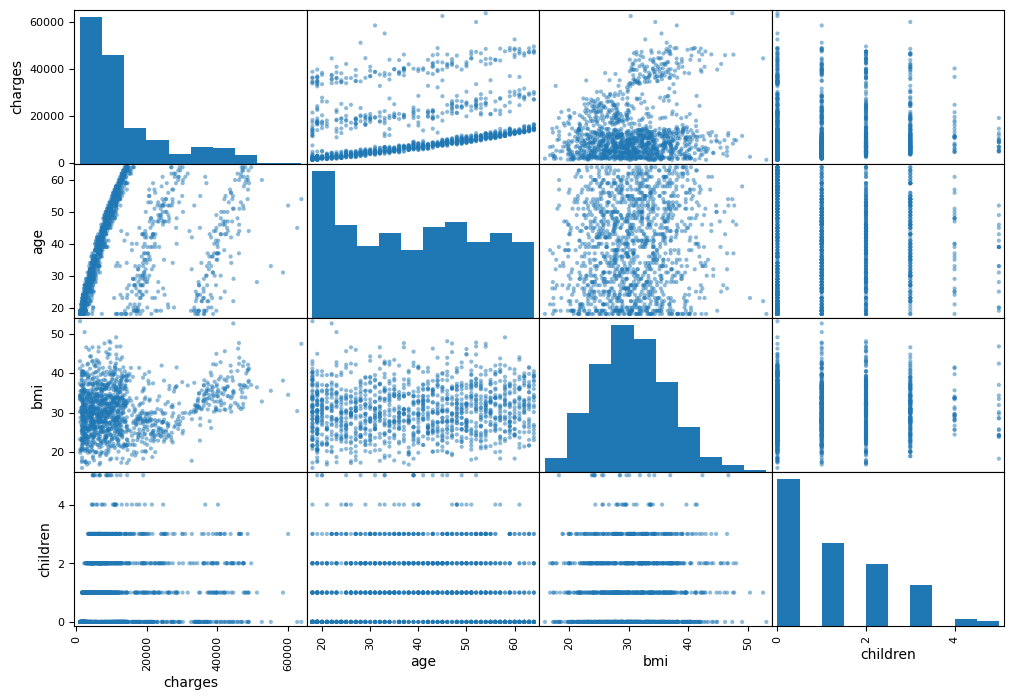

In [16]:
# plot a scatter matrix
attributes = ['charges', 'age', 'bmi', 'children']
scatter_matrix(ins[attributes], figsize = (12, 8))

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='bmi', ylabel='charges'>

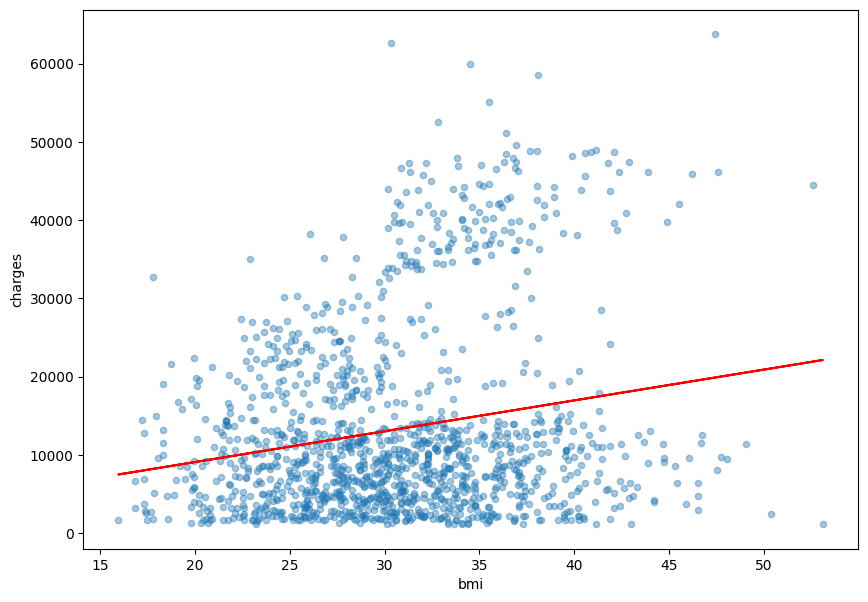

In [ ]:
# plot a single scatter plot for bmi and annual medical costs
ins.plot(
    kind = 'scatter', # draw a scatter plot
    x = 'bmi', # feature at x-axis
    y = 'charges', # feature at y-axis
    alpha = 0.4, # marker transparency level
    figsize = (10, 7), # figure width and height
    cmap = plt.get_cmap('jet') # call a predefined color map
  )

# add a linear regression line
beta1, beta0 = np.polyfit(ins['bmi'], ins['charges'], 1)
plt.plot(ins['bmi'], beta1 * ins['bmi'] + beta0, 'r')

In [ ]:
# seperate the target (charges) from the features
y = np.c_[ins['charges']] # target
X = ins.drop('charges', axis = 1) # features
print(X.shape)
print(y.shape)

(1338, 6)
(1338, 1)


In [ ]:
# create a pipeline to process numerical features
num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')), # replace missing values, if any, with the median of a feature
    ('std_scaler', StandardScaler()) # standardize a feature
  ])

In [ ]:
# provide a list of numerical features and a list of categorical features
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

In [ ]:
# create a full pipeline to process both numerical and categorical features
full_pipline = ColumnTransformer([
  ('num', num_pipline, num_features), # process numerical features using the numerical feature pipline created
  ('cat', OneHotEncoder(), cat_features) # process categorical features using one-hot encoder
  ])

In [ ]:
# split data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, # features
    y, # target
    test_size = 0.2, # 20% data to be included in the test set
    random_state = 42 # specify random seed for results replication
  )

In [ ]:
# fit and transform the train set using the full pipeline
X_train = full_pipline.fit_transform(X_train)

In [ ]:
# transform the test set using the full pipeline
X_test = full_pipline.transform(X_test)

In [ ]:
# train and evaluate the train set using a linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# take a look at a few instances
print(lin_reg.predict(X_train[:5])) # predict the labels for the first 5 instances using the fitted linear model
print('\n')
print(list(y_train[:5])) # print the true labels

[[ 7094.54007011]
 [ 8344.72998713]
 [ 9153.77419778]
 [11128.37948103]
 [10088.00517924]]


[array([9193.8385]), array([8534.6718]), array([27117.99378]), array([8596.8278]), array([12475.3513])]


In [ ]:
# calculate root mean square error (rmse) using the test set
y_pred_lin = lin_reg.predict(X_test) # predict charges
lin_mse = mean_squared_error(y_pred_lin, y_test) # calculate mean squared error
lin_rmse = np.sqrt(lin_mse) # calculate rmse
print(lin_rmse)

5796.284659276275


In [ ]:
# train and evaluate the train set using a decision tree regressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree = tree_reg.predict(X_test) # predict charges
tree_mse = mean_squared_error(y_pred_tree, y_test) # calculate mean squared error
tree_rmse = np.sqrt(tree_mse) # calculate rmse
print('\n')
print(tree_rmse)

DecisionTreeRegressor()



6205.913589067858


In [ ]:
# k-fold cross-validation
scores = cross_val_score(tree_reg, X_train, y_train.ravel(),
                         scoring = 'neg_mean_squared_error', cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
# build a function to display cross-validation scores
def display_scores(scores):
  print('scores:', scores) # print all scores
  print('mean:', scores.mean()) # print the mean of scores
  print('standard deviation:', scores.std()) # print the standard deviation of scores
display_scores(tree_rmse_scores)

scores: [6087.15368339 6382.30166514 6511.92519385 6730.87580507 6874.59722417
 5817.83125521 7123.15997997 7350.24916403 6745.06749616 5416.81566989]
mean: 6503.997713688792
standard deviation: 564.611074864481


In [ ]:
# cross-validate a random-forest model
forest_reg = RandomForestRegressor()
scores = cross_val_score(
    forest_reg, # model
    X_train, # features
    y_train.ravel(), # target, change shape from (rows, 1) to (rows, ) as required
    scoring = 'neg_mean_squared_error', # -1 * mean squared error
    cv = 10 # number of cross-validations to run
  )
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

scores: [4746.3433761  5305.67579061 3897.04314656 4444.07314369 5255.82330282
 4857.06796617 5584.62285649 5456.50763303 5163.53656121 4674.06850038]
mean: 4938.476227706125
standard deviation: 491.378662292248


In [ ]:
# show available hyperparameters that can be fune-tuned
forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# conduct a grid search for the random-forest model
param_grid = [{
    'n_estimators': np.arange(10, 100, 10), # number of trees to grow
    'max_features': np.arange(1, X_train.shape[1] + 1) # maximum number of features
  }]
grid_search = GridSearchCV(
    forest_reg, # model
    param_grid, # parameters grid
    cv = 5, # number of cross-validations to run
    scoring = 'neg_mean_squared_error', # -1 * mean squared error
    return_train_score = True)
grid_search.fit(X_train, y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                          'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# get the best parameter values
grid_search.best_params_

{'max_features': 4, 'n_estimators': 60}

In [ ]:
# get the best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=60)

In [ ]:
# print all evaluation scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
  print(np.sqrt(-mean_score), params)

5650.2886216666275 {'max_features': 1, 'n_estimators': 10}
5352.842852091047 {'max_features': 1, 'n_estimators': 20}
5336.42559377756 {'max_features': 1, 'n_estimators': 30}
5324.785478771892 {'max_features': 1, 'n_estimators': 40}
5155.716196053823 {'max_features': 1, 'n_estimators': 50}
5165.465372660739 {'max_features': 1, 'n_estimators': 60}
5232.58814905599 {'max_features': 1, 'n_estimators': 70}
5174.011385009883 {'max_features': 1, 'n_estimators': 80}
5232.110063745636 {'max_features': 1, 'n_estimators': 90}
5207.275504678244 {'max_features': 2, 'n_estimators': 10}
5008.029623905424 {'max_features': 2, 'n_estimators': 20}
5035.121151203861 {'max_features': 2, 'n_estimators': 30}
5054.524506079007 {'max_features': 2, 'n_estimators': 40}
4997.629455299678 {'max_features': 2, 'n_estimators': 50}
5012.916159230278 {'max_features': 2, 'n_estimators': 60}
4952.241972772052 {'max_features': 2, 'n_estimators': 70}
4974.020767776908 {'max_features': 2, 'n_estimators': 80}
5024.1357149496

In [ ]:
# print feature importance for all features
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[0.14308375 0.17354697 0.02530604 0.00452711 0.00457254 0.33228755
 0.2946987  0.00641222 0.00530581 0.00587266 0.00438666]


In [ ]:
# print the feature importance side-by-side with correponding feature name
cat_encoder = full_pipline.named_transformers_['cat'] # the categories added by the full pipline under the transformer 'cat'
cat_one_hot_features = [item for sublist in cat_encoder.categories_ for item in sublist] # flatten the list
features = num_features + cat_one_hot_features
sorted(zip(feature_importances, features), reverse = True) # sort by the descending order of feature importance

[(0.33357689532456875, 'yes'),
 (0.283637296221879, 'no'),
 (0.1839949591330452, 'bmi'),
 (0.1421701106235595, 'age'),
 (0.023887807473269334, 'children'),
 (0.007414528611799769, 'northeast'),
 (0.005791775838888565, 'southeast'),
 (0.005286367704228884, 'northwest'),
 (0.004975414930393476, 'female'),
 (0.0046379227630926525, 'male'),
 (0.00462692137527488, 'southwest')]

In [ ]:
# evaluate the model on the test set
final_model = grid_search.best_estimator_ # use the best model as the final model
y_pred_final = final_model.predict(X_test)
final_mse = mean_squared_error(y_pred_final, y_test)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

4582.845611824603


In [ ]:
# conduct a randomized search for the random-forest model
param_distribs = {
    'n_estimators': randint(low = 1, high = 200), # number of trees to grow
    'max_features': randint(low = 1, high = 11) # maximum number of features
  }
forest_reg = RandomForestRegressor()
rnd_search = RandomizedSearchCV(
    forest_reg, # model
    param_distributions = param_distribs, # parameter distributions
    n_iter = 10, # number of parameters to randomly choose
    cv = 5, # number of cross-validations to run
    scoring = 'neg_mean_squared_error')
rnd_search.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
# print evaluation scores
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

4807.286852748176 {'max_features': 7, 'n_estimators': 104}
4811.770594612956 {'max_features': 3, 'n_estimators': 187}
4897.675770619301 {'max_features': 10, 'n_estimators': 65}
4927.391181014548 {'max_features': 10, 'n_estimators': 53}
4934.623649998202 {'max_features': 2, 'n_estimators': 82}
4791.773537915735 {'max_features': 5, 'n_estimators': 194}
4837.80224895878 {'max_features': 4, 'n_estimators': 77}
4955.195877930286 {'max_features': 3, 'n_estimators': 14}
4868.747309793304 {'max_features': 7, 'n_estimators': 69}
5271.8734042077685 {'max_features': 1, 'n_estimators': 44}


In [ ]:
# show best parameter values
rnd_search.best_params_

{'max_features': 5, 'n_estimators': 194}